In [86]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform,LabelEncoder,OrdinalEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [89]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [90]:
#somecolumns have 0 null values so we will drop them 
df.drop(['other_fuel3','other_fuel2','estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019','country','gppd_idnr','owner','source','url','geolocation_source','latitude',
'longitude','generation_data_source'],axis=1,inplace=True)
df.head()

,country_long,name,capacity_mw,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,2.5,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,135.0,Gas,NaN,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,India,AKALTARA TPP,1800.0,Coal,Oil,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [91]:
# Loan_Id attribute is of no use in prediction .As we have year also ...so we can drop date also.....we will do ths later before scaling.

df.shape

(907, 12)

In [92]:
df.isnull().sum().sum()

3870

In [93]:
#data has 3962 null values so we will handle them by fillna method by mean and mode 
df['commissioning_year'] = df['commissioning_year'].fillna(0)
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(0)
df['other_fuel1']= df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['generation_gwh_2016']= df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2017']= df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']= df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())                                        

In [94]:
df.isnull().sum()

country_long             0
name                     0
capacity_mw              0
primary_fuel             0
other_fuel1              0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [207]:
#now we will perfom some encoding techniques to encode categorical features
enc = OrdinalEncoder()
df[["other_fuel1"]] = enc.fit_transform(df[["other_fuel1"]])

In [216]:
ohe=OneHotEncoder()
df['primary_fuel']=df['primary_fuel'].astype('category')
df['pf_new']=df['primary_fuel'].cat.codes
ohe_df=pd.DataFrame(ohe.fit_transform(df[['pf_new']]).toarray())
 
#Merge with main
df_new=df.join(ohe_df)
 
df_new    


,country_long,name,capacity_mw,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,generation_gwh_2018,pf_new,0,1,2,3,4,5,6,7
0,India,ACME Solar Tower,2.5,Solar,2.0,2011.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,India,ADITYA CEMENT WORKS,98.0,Coal,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,India,AES Saurashtra Windfarms,39.2,Wind,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,India,AGARTALA GT,135.0,Gas,2.0,2004.0,2019.0,617.789264,843.747000,886.004428,...,626.239128,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,India,AKALTARA TPP,1800.0,Coal,2.0,2015.0,2019.0,3035.550000,5916.370000,6243.000000,...,7279.000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,Coal,2.0,2016.0,2019.0,2431.823590,0.994875,233.596650,...,686.500000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
903,India,Yelesandra Solar Power Plant,3.0,Solar,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
904,India,Yelisirur wind power project,25.5,Wind,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
905,India,ZAWAR MINES,80.0,Coal,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,...,2600.804099,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
#we can clearly see that there are no null values.so we can continue with the data

df.describe()

,capacity_mw,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pf_new
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1.995590,1160.382580,1155.304300,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,3.206174
std,590.085456,0.081259,985.973139,999.466215,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,2.280652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,2.000000,0.000000,0.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,1.000000
50%,59.200000,2.000000,1978.000000,2019.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,3.000000
75%,385.250000,2.000000,2003.000000,2019.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.000000
max,4760.000000,2.000000,2018.000000,2019.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,7.000000


In [218]:
df.dtypes

country_long               object
name                       object
capacity_mw               float64
primary_fuel             category
other_fuel1               float64
commissioning_year        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
pf_new                       int8
dtype: object

In [219]:
df

,country_long,name,capacity_mw,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pf_new
0,India,ACME Solar Tower,2.5,Solar,2.0,2011.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6
1,India,ADITYA CEMENT WORKS,98.0,Coal,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,India,AES Saurashtra Windfarms,39.2,Wind,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7
3,India,AGARTALA GT,135.0,Gas,2.0,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,2
4,India,AKALTARA TPP,1800.0,Coal,2.0,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,Coal,2.0,2016.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1
903,India,Yelesandra Solar Power Plant,3.0,Solar,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6
904,India,Yelisirur wind power project,25.5,Wind,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7
905,India,ZAWAR MINES,80.0,Coal,2.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [220]:
df.corr()

,capacity_mw,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pf_new
capacity_mw,1.000000,0.003105,0.414667,4.178962e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-0.380395
other_fuel1,0.003105,1.000000,-0.045620,-4.695180e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,0.004912
commissioning_year,0.414667,-0.045620,1.000000,9.817166e-01,1.756471e-03,1.945082e-03,2.252763e-03,2.255656e-03,2.302040e-03,-0.481665
year_of_capacity_data,0.417896,-0.046952,0.981717,1.000000e+00,-1.800374e-16,-6.590075e-17,-1.134680e-17,2.014619e-16,-5.989493e-17,-0.500558
generation_gwh_2014,0.694350,0.024505,0.001756,-1.800374e-16,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,-0.124769
generation_gwh_2015,0.711190,0.026790,0.001945,-6.590075e-17,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,-0.124828
generation_gwh_2016,0.742221,0.031575,0.002253,-1.134680e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01,-0.131051
generation_gwh_2017,0.757585,0.021117,0.002256,2.014619e-16,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01,-0.132003
generation_gwh_2018,0.773456,0.035675,0.002302,-5.989493e-17,8.849556e-01,9.234611e-01,9.571589e-01,9.826888e-01,1.000000e+00,-0.136983
pf_new,-0.380395,0.004912,-0.481665,-5.005583e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,1.000000


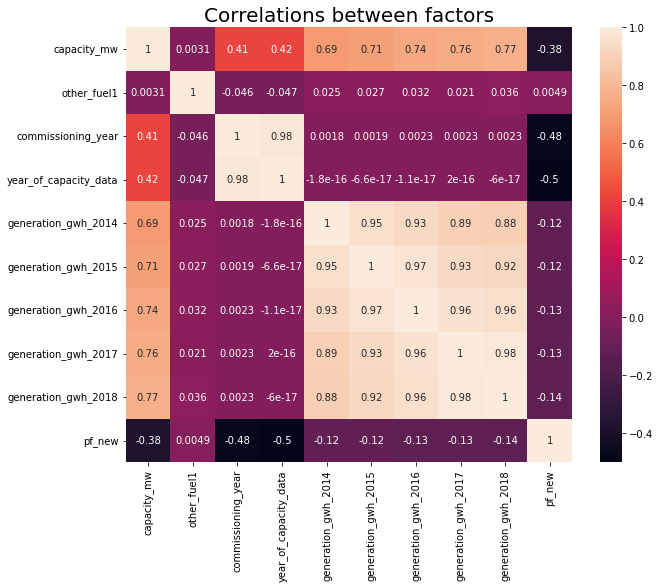

In [221]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

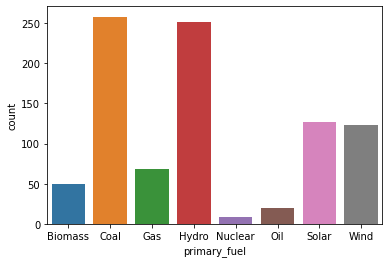

In [227]:
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

In [ ]:
#it is clear by the plot that major fuel used by power plants in INDIA is coal and hydro power

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

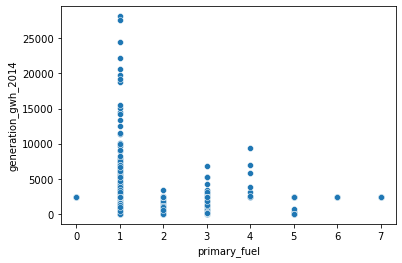

In [353]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In [ ]:
#primary fuel used in INDIA is coal and its peak generation is around 27000 gigawatts per hour with capacity of 4000 mw

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

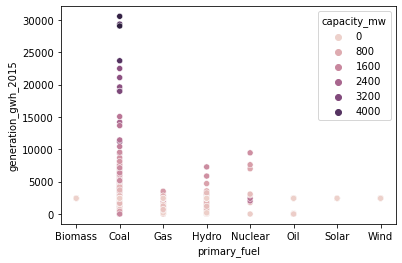

In [229]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',hue='capacity_mw',data=df)

In [ ]:
#primary fuel used in INDIA is coal and its peak generation  is around 31000 gigawatts per hour with capacity of 4000 mw

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

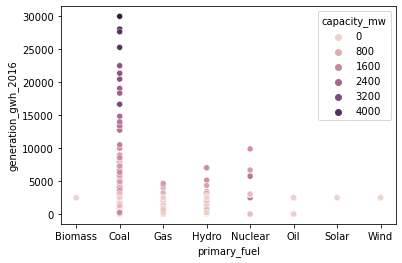

In [230]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',hue='capacity_mw',data=df)

In [ ]:
#this year also primary fuel used in INDIA is coal and its peak generation  is around 30000 gigawatts per hour with capacity of 4000 mw

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

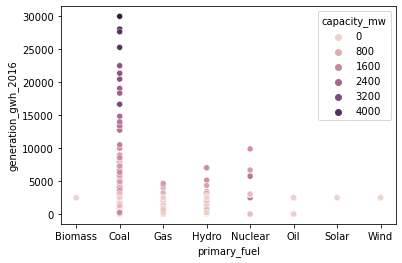

In [231]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',hue='capacity_mw',data=df)

In [ ]:
#In 2016 also coal is primary fuel used in INDIA  and its peak generation  is around 30000 gigawatts per hour with capacity of 4000 mw

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

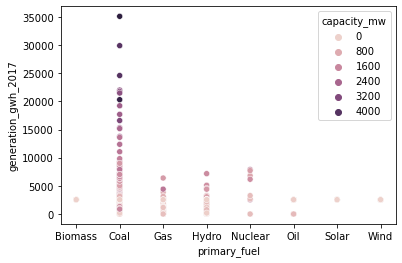

In [232]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',hue='capacity_mw',data=df)

In [ ]:
#primary fuel used in INDIA is coal  with capacity of 4000 mw it generated 20000-35000 gigawatts per hour

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

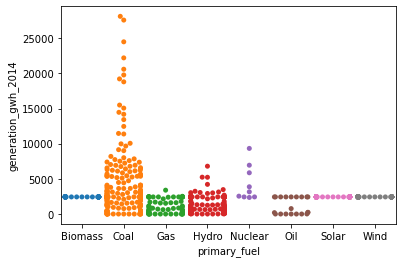

In [233]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In [ ]:
#by this plot we can see that major generation primary fuel is coal with 25000 gwh and rest lie around 4000-5000 gwh

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

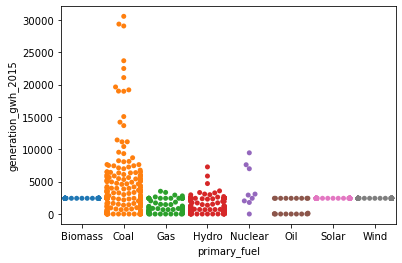

In [234]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

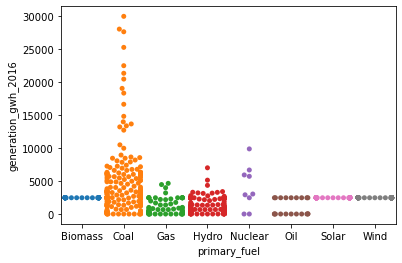

In [235]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

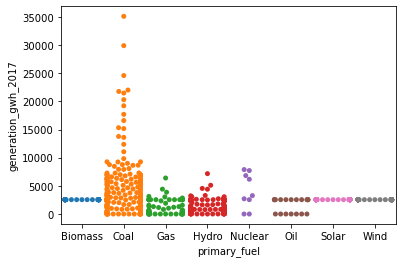

In [236]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

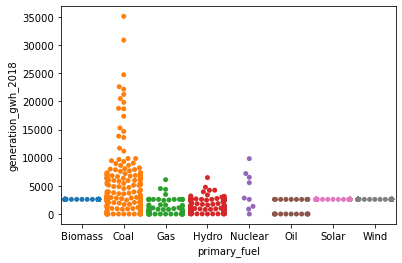

In [237]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2018',data=df)

In [ ]:
#we can interpret by these plots that major primary fuel is coal...now we go ahead by building our model

In [238]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

In [ ]:
#count of coal and hydro is almost same 

In [239]:
y = df['primary_fuel']
X = df.drop(columns=['primary_fuel','commissioning_year','year_of_capacity_data','country_long','name'])

In [240]:
#NOW we check for skewness in data
df.skew()

capacity_mw               3.123576
other_fuel1             -20.453120
commissioning_year       -0.328505
year_of_capacity_data    -0.292409
generation_gwh_2014       5.035446
generation_gwh_2015       5.364134
generation_gwh_2016       5.068427
generation_gwh_2017       5.110952
generation_gwh_2018       4.937907
pf_new                    0.472251
dtype: float64

In [241]:
x_new=power_transform(X)

In [242]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

1   -17.330022
7    -0.047067
6     0.000783
5     0.018337
0     0.022164
4     0.041821
3     0.074582
2     0.123226
dtype: float64

In [243]:
#as we can see by the boxplot that there is no outliers present...so we are good to go ahead

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [244]:
X_scaled.shape[1]

8

In [245]:
vif=pd.DataFrame()

In [246]:
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [247]:
vif["Features"]=X.columns
vif

,vif,Features
0,3.102134,capacity_mw
1,1.010071,other_fuel1
2,11.135292,generation_gwh_2014
3,26.241106,generation_gwh_2015
4,33.292405,generation_gwh_2016
5,37.175723,generation_gwh_2017
6,32.428534,generation_gwh_2018
7,1.260249,pf_new


In [248]:
X_scaled.shape

(907, 8)

In [ ]:
##############    PREDICTION OF PRIMARY FUEL  #############################

In [249]:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.8979310344827586
At random state0,the testing accuracy is:-0.945054945054945


At random state1,the training accuracy is:-0.9103448275862069
At random state1,the testing accuracy is:-0.9010989010989011


At random state2,the training accuracy is:-0.9172413793103448
At random state2,the testing accuracy is:-0.8626373626373627


At random state3,the training accuracy is:-0.9075862068965517
At random state3,the testing accuracy is:-0.9175824175824175


At random state4,the training accuracy is:-0.9089655172413793
At random state4,the testing accuracy is:-0.9175824175824175


At random state5,the training accuracy is:-0.9158620689655173
At random state5,the testing accuracy is:-0.9175824175824175


At random state6,the training accuracy is:-0.9158620689655173
At random state6,the testing accuracy is:-0.9120879120879121


At random state7,the training accuracy is:-0.9131034482758621
At random state7,the testing accuracy is:-0.8901098901098901


A

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [251]:
X_train.shape

(725, 8)

In [252]:
y_train.shape

(725,)

In [253]:
X_test.shape

(182, 8)

In [254]:
y_test.shape

(182,)

In [ ]:
#now as we have train test  split our data ,we will train our machine learning models and fit our model into it

In [255]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

accuracy score: 75.82417582417582
cross val score: 76.6304413818226


In [256]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 100.0
cross val score: 100.0


In [282]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)
y_pred=gnb.predict(X_test)
gnb_score=accuracy_score(y_test,y_pred)
print('accuracy score:',gnb_score*100)

score=cross_val_score(gnb,X,y,cv=5)
cvs=score.mean()
print('cross val score:',cvs*100)

accuracy score: 97.25274725274726
cross val score: 96.1459534940198


In [258]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 100.0
cross val score: 99.00734624491531


In [259]:
#so according to dataset  DecisionTreeclassifier is getting best accuracy of 100%,which is best among all and 
#now we do gridsearcv hyperparametertuning on this algorithm

In [290]:
grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[None],
 'min_samples_leaf':[1],'splitter':['best','random']}
clf=GridSearchCV(dt,grid_parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_features='log2',
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1],
                         'splitter': ['best', 'random']})

In [291]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'random'}


In [292]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_features='log2',max_depth=None, max_leaf_nodes=None, min_samples_leaf= 1,splitter='random')
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=rfscore.mean()
print('cross val score:',dtc*100)

accuracy score: 96.7032967032967
cross val score: 99.22834072005344


In [293]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [294]:
clf.best_estimator_

DecisionTreeClassifier(max_features='auto', splitter='random')

In [295]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.967032967032967

In [296]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 8,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  2,  0,  0,  0],
       [ 0,  1,  3, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0, 25]], dtype=int64)

              precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00         8
        Coal       0.98      1.00      0.99        58
         Gas       0.67      0.75      0.71         8
       Hydro       0.96      0.92      0.94        53
         Oil       1.00      1.00      1.00         5
       Solar       1.00      1.00      1.00        25
        Wind       1.00      1.00      1.00        25

    accuracy                           0.97       182
   macro avg       0.94      0.95      0.95       182
weighted avg       0.97      0.97      0.97       182



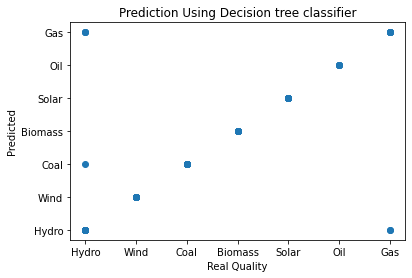

In [298]:
print(classification_report(y_test,y_pred))

plt.scatter(y_test,y_pred)
plt.title("Prediction Using Decision tree classifier")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [ ]:
#so according to  dataset  after hyperparameter tuning ,we have fitted our best model ofDecision tree classifier   which is getting accuracy of 96% and cross validation score of 99.2%



In [301]:
#saving the model to local file system
filename='global power plant_model.pickle'
pickle.dump(dt,open(filename,'wb'))

In [302]:
############################ PREDICTION OF CAPACITY_MW ##################################################

In [312]:
y = df['capacity_mw']
X = df.drop(columns=['capacity_mw','commissioning_year','year_of_capacity_data','country_long','name'])

In [313]:
enc = OrdinalEncoder()
df[["primary_fuel"]] = enc.fit_transform(df[["primary_fuel"]])

In [314]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [315]:
X_scaled.shape[1]

8

In [316]:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.9703065528721044
At random state0,the testing accuracy is:-0.9210713413479329


At random state1,the training accuracy is:-0.978236453846646
At random state1,the testing accuracy is:-0.8554241038791807


At random state2,the training accuracy is:-0.9755123395419244
At random state2,the testing accuracy is:-0.8174248385176117


At random state3,the training accuracy is:-0.9734605198875799
At random state3,the testing accuracy is:-0.8719246386816351


At random state4,the training accuracy is:-0.9742580009094944
At random state4,the testing accuracy is:-0.91580983851184


At random state5,the training accuracy is:-0.9726224282906398
At random state5,the testing accuracy is:-0.9021838700488287


At random state6,the training accuracy is:-0.9808120464342501
At random state6,the testing accuracy is:-0.849823581576501


At random state7,the training accuracy is:-0.9778254465560262
At random state7,the testing accuracy is:-0.7925624409270707


At r

In [317]:
X_train.shape

(725, 8)

In [318]:
y_train.shape

(725,)

In [319]:
X_test.shape

(182, 8)

In [320]:
y_test.shape

(182,)

In [321]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=87)

In [322]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

R2 score: 93.84512802256573
cross val score: 84.9825429019824


In [323]:
#lets plot and visualize
y_pred=rf.predict(X_test)
y_pred

array([  18.51088358,  304.436     ,   20.26892002,   34.02635391,
        464.35971   ,   18.51088358,   80.082004  ,   20.26892002,
         34.02635391,   18.51088358,   69.27142   ,  473.41732   ,
        704.39      ,   11.4478203 ,  609.65      , 1087.4       ,
        983.80340366,   11.4478203 ,   80.082004  ,   20.26892002,
         80.082004  ,  110.77581   ,   80.082004  ,   34.02635391,
         11.4478203 ,  200.6526119 , 2525.5       ,   20.26892002,
         34.02635391, 1340.7       ,   20.26892002,  643.5       ,
       1470.5832    ,   18.51088358,   18.51088358,   18.51088358,
         18.51088358,  474.1228    ,  104.2474    ,   18.51088358,
         20.26892002, 1339.4       ,   34.02635391,   20.26892002,
         34.02635391,   18.51088358, 1336.4       ,  798.632     ,
       1424.9       ,  104.2474    ,  144.3403    ,  214.60848   ,
        364.3773    ,   18.51088358,  293.746     ,   18.51088358,
         34.02635391,   20.26892002,   18.51088358,   34.02635

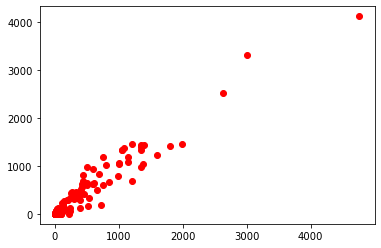

In [324]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual average price'
plt.ylabel='Predicted average price'
plt.title='Actual vs model predicted '
plt.show()

In [325]:
 mean_squared_error(y_test,y_pred)

21201.755339440275

In [326]:
mean_absolute_error(y_test,y_pred)

82.90097244648406

In [327]:
np.sqrt(mean_squared_error(y_test,y_pred))

145.60822552122622

In [328]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [329]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)
dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)

R2 score: 87.97384498390932
cross val score: 76.33612512156587


In [330]:
mean_squared_error(y_test,y_pred)

41426.62873576558

In [331]:
mean_absolute_error(y_test,y_pred)

107.28935828121058

In [332]:
np.sqrt(mean_squared_error(y_test,y_pred))

203.53532552302948

In [333]:
import xgboost as xgb
from xgboost import XGBRegressor
xg=XGBRegressor()

In [334]:
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=r2_score(y_test,y_pred)
print('R2 score:',xg_score*100)
xgscore=cross_val_score(xg,X,y,cv=5)
xgr=dtscore.mean()
print('cross val score:',xgr*100)

R2 score: 84.01546978512022
cross val score: 76.33612512156587


In [335]:
 mean_squared_error(y_test,y_pred)

55062.08741210016

In [336]:
mean_absolute_error(y_test,y_pred)

112.79563789619195

In [337]:
np.sqrt(mean_squared_error(y_test,y_pred))

234.65312146251148

In [338]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
y_pred=ada.predict(X_test)
ada_score=r2_score(y_test,y_pred)
print('R2 score:',ada_score*100)

adascore=cross_val_score(ada,X,y,cv=5)
adab=adascore.mean()
print('cross val score:',adab*100)

R2 score: 75.14412306281075
cross val score: 73.44997819510809


In [339]:
 mean_squared_error(y_test,y_pred)

85621.3132460967

In [340]:
mean_absolute_error(y_test,y_pred)

220.30718274814396

In [341]:
np.sqrt(mean_squared_error(y_test,y_pred))

292.6111980873198

In [342]:
#as observed the random forest regressor works well with this dataset...so we hypertune parameters of final model RandomForestRegressor using gridsearchCV

parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'min_samples_split':[2], 
             'min_samples_leaf':[1], 'bootstrap':[True]}

In [343]:
rf=RandomForestRegressor()
gcv=GridSearchCV(rf,parameters)
gcv.fit(X_train,y_train)
print(gcv.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [347]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt',min_samples_split=2, 
             min_samples_leaf=1, bootstrap=True)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

R2 score: 93.53234686305251
cross val score: 85.90473004756485


In [349]:
 mean_squared_error(y_test,y_pred)

22279.19604707789

In [350]:
mean_absolute_error(y_test,y_pred)


84.6113721978022

In [351]:
np.sqrt(mean_squared_error(y_test,y_pred))


149.26217219067223

In [352]:
#the best model is RandomForestRegressor with 93% accuracy and 85% cross validation score 

#saving the model to local file system
filename='globalpowerplant_model.pickle'
pickle.dump(rf,open(filename,'wb'))